In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
count = 0
for file in os.listdir("./basketball_reference/game_logs/"):
    if file.endswith("_2017.csv"):
        count += 1
        print count, file

1 Abrines_Alex_2017.csv
2 Acy_Quincy_2017.csv
3 Adams_Steven_2017.csv
4 Afflalo_Arron_2017.csv
5 Ajinca_Alexis_2017.csv
6 Aldrich_Cole_2017.csv
7 Aldridge_LaMarcus_2017.csv
8 Allen_Lavoy_2017.csv
9 Allen_Tony_2017.csv
10 Aminu_Al_Farouq_2017.csv
11 Andersen_Chris_2017.csv
12 Anderson_Alan_2017.csv
13 Anderson_Justin_2017.csv
14 Anderson_Kyle_2017.csv
15 Anderson_Ryan_2017.csv
16 Antetokounmpo_Giannis_2017.csv
17 Anthony_Carmelo_2017.csv
18 Anthony_Joel_2017.csv
19 Ariza_Trevor_2017.csv
20 Arthur_Darrell_2017.csv
21 Asik_Omer_2017.csv
22 Augustin_D.J._2017.csv
23 Babbitt_Luke_2017.csv
24 Baker_Ron_2017.csv
25 Baldwin_Wade_2017.csv
26 Barbosa_Leandro_2017.csv
27 Barea_J.J._2017.csv
28 Barnes_Harrison_2017.csv
29 Barnes_Matt_2017.csv
30 Barton_Will_2017.csv
31 Bass_Brandon_2017.csv
32 Batum_Nicolas_2017.csv
33 Bayless_Jerryd_2017.csv
34 Baynes_Aron_2017.csv
35 Bazemore_Kent_2017.csv
36 Beal_Bradley_2017.csv
37 Beasley_Malik_2017.csv
38 Beasley_Michael_2017.csv
39 Belinelli_Marco_2017.csv


In [3]:
df = pd.DataFrame()
for file in os.listdir("./basketball_reference/game_logs/"):
    if file.endswith("2017.csv"):
        filepath = "./basketball_reference/game_logs/" + file
#         print filepath
        data = pd.read_csv(filepath)
        df = df.append(data)

In [4]:
df.tail()

,game,date,team,loc,opp,result,gs,mp,fg,fga,...,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,Name
33,34,2017-03-21,LAL,NaN,LAC,L (-24),1,35:50,8,14,...,20.1,10.5,12.4,1.4,2.6,6.3,19.0,118.0,134.0,Ivica Zubac
34,35,2017-03-24,LAL,NaN,MIN,W (+11),1,21:18,3,7,...,16.6,9.4,19.4,2.4,0.0,35.0,23.7,75.0,111.0,Ivica Zubac
35,36,2017-03-26,LAL,NaN,POR,L (-16),1,25:57,4,9,...,24.4,12.6,14.5,0.0,0.0,9.2,19.8,93.0,100.0,Ivica Zubac
36,37,2017-03-28,LAL,NaN,WAS,L (-11),1,17:42,3,8,...,18.1,12.9,7.8,5.5,3.8,0.0,24.1,124.0,108.0,Ivica Zubac
37,38,2017-03-30,LAL,@,MIN,L (-15),1,2:14,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,40.2,105.0,135.0,Ivica Zubac


In [5]:
df = df.reset_index()

In [6]:
df

,index,game,date,team,loc,opp,result,gs,mp,fg,...,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,Name
0,0,1,2016-10-26,OKC,@,PHI,W (+6),0,13:24,1,...,8.0,3.7,0.0,0.0,0.0,50.0,12.4,64.0,101.0,Alex Abrines
1,1,2,2016-10-30,OKC,NaN,LAL,W (+17),0,1:49,1,...,0.0,0.0,0.0,25.0,0.0,0.0,50.5,235.0,49.0,Alex Abrines
2,2,3,2016-11-02,OKC,@,LAC,W (+2),0,7:54,2,...,0.0,0.0,0.0,0.0,0.0,50.0,21.4,101.0,91.0,Alex Abrines
3,3,4,2016-11-03,OKC,@,GSW,L (-26),0,19:20,1,...,11.5,8.6,7.6,0.0,0.0,0.0,14.8,100.0,132.0,Alex Abrines
4,4,5,2016-11-05,OKC,NaN,MIN,W (+20),0,17:16,0,...,11.8,6.8,12.4,3.0,0.0,0.0,3.7,132.0,99.0,Alex Abrines
5,5,6,2016-11-07,OKC,NaN,MIA,W (+12),0,16:59,2,...,5.8,6.4,0.0,3.0,0.0,18.2,28.7,53.0,94.0,Alex Abrines
6,6,7,2016-11-09,OKC,NaN,TOR,L (-10),0,4:50,1,...,0.0,0.0,0.0,0.0,0.0,50.0,18.6,78.0,127.0,Alex Abrines
7,7,8,2016-11-11,OKC,NaN,LAC,L (-2),0,12:56,1,...,7.9,4.1,0.0,0.0,0.0,25.8,12.8,76.0,114.0,Alex Abrines
8,8,9,2016-11-13,OKC,NaN,ORL,L (-2),0,18:55,3,...,20.0,9.5,0.0,0.0,0.0,12.5,17.9,90.0,127.0,Alex Abrines
9,9,10,2016-11-14,OKC,@,DET,L (-16),0,17:24,1,...,6.6,2.8,9.1,0.0,0.0,11.3,21.7,67.0,108.0,Alex Abrines


In [7]:
del df['index']

In [8]:
df.columns.values

array(['game', 'date', 'team', 'loc', 'opp', 'result', 'gs', 'mp', 'fg',
       'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct',
       'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts',
       'gmsc', 'plus_minus', 'ts_pct', 'eFG_pct', 'orb_pct', 'drb_pct',
       'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct',
       'off_rtg', 'def_rtg', 'Name'], dtype=object)

In [9]:
# data cleaning for all game_log files
df['date'] = pd.to_datetime(df['date'])
df.rename(columns={'loc': 'Home_Game'}, inplace=True)
df['Home_Game'] = [0 if item == "@" else 1 for item in df['Home_Game']]
df['result'] = [item[3:].replace(")","") for item in df['result']]
df['result'] = df['result'].astype(float)
df['mp'] = [0 if pd.isnull(item) else round(float(item.split(":")[0]) + float(item.split(":")[1])/60. , 2) for item in df['mp']]

In [10]:
df.mp.max()

60.119999999999997

In [11]:
df[df['mp'] < 1].shape

(206, 41)

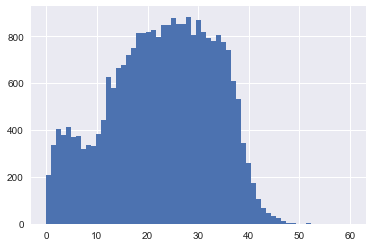

In [12]:
df['mp'].hist(bins = 61)

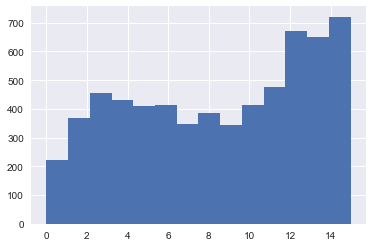

In [13]:
df[df['mp'] < 15]['mp'].hist(bins=14)

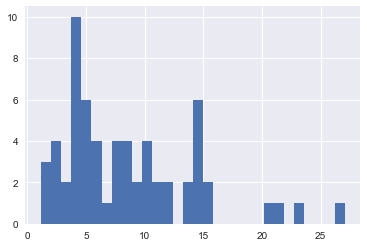

In [14]:
df[df['Name'] == "Cole Aldrich"]['mp'].hist(bins=30)

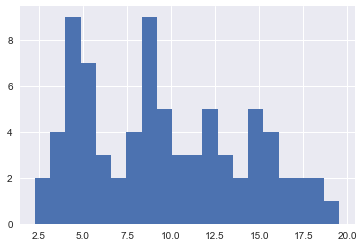

In [15]:
df[df['Name'] == "JaVale McGee"]['mp'].hist(bins=20)

In [16]:
df = df[df['mp'] > 2]

In [17]:
df.shape

(25581, 41)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25581 entries, 0 to 26138
Data columns (total 41 columns):
game          25581 non-null int64
date          25581 non-null datetime64[ns]
team          25581 non-null object
Home_Game     25581 non-null int64
opp           25581 non-null object
result        25581 non-null float64
gs            25581 non-null int64
mp            25581 non-null float64
fg            25581 non-null int64
fga           25581 non-null int64
fg_pct        24866 non-null float64
fg3           25581 non-null int64
fg3a          25581 non-null int64
fg3_pct       18383 non-null float64
ft            25581 non-null int64
fta           25581 non-null int64
ft_pct        14805 non-null float64
orb           25581 non-null int64
drb           25581 non-null int64
trb           25581 non-null int64
ast           25581 non-null int64
stl           25581 non-null int64
blk           25581 non-null int64
tov           25581 non-null int64
pf            25581 non-null i

In [19]:
del df['fg_pct']
del df['fg3_pct']
del df['ft_pct']

In [20]:
df = df.dropna(axis=0, how='any')

In [21]:
cols = list(df.columns.values[5:-1])

In [22]:
cols = [col for col in cols if col not in ['fg_pct','fg3_pct','ft_pct']] + ['Home_Game']

In [23]:
cols

['result',
 'gs',
 'mp',
 'fg',
 'fga',
 'fg3',
 'fg3a',
 'ft',
 'fta',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pf',
 'pts',
 'gmsc',
 'plus_minus',
 'ts_pct',
 'eFG_pct',
 'orb_pct',
 'drb_pct',
 'trb_pct',
 'ast_pct',
 'stl_pct',
 'blk_pct',
 'tov_pct',
 'usg_pct',
 'off_rtg',
 'def_rtg',
 'Home_Game']

In [24]:
df

,game,date,team,Home_Game,opp,result,gs,mp,fg,fga,...,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,Name
0,1,2016-10-26,OKC,0,PHI,6.0,0,13.40,1,2,...,8.0,3.7,0.0,0.0,0.0,50.0,12.4,64.0,101.0,Alex Abrines
2,3,2016-11-02,OKC,0,LAC,2.0,0,7.90,2,2,...,0.0,0.0,0.0,0.0,0.0,50.0,21.4,101.0,91.0,Alex Abrines
3,4,2016-11-03,OKC,0,GSW,-26.0,0,19.33,1,6,...,11.5,8.6,7.6,0.0,0.0,0.0,14.8,100.0,132.0,Alex Abrines
4,5,2016-11-05,OKC,1,MIN,20.0,0,17.27,0,1,...,11.8,6.8,12.4,3.0,0.0,0.0,3.7,132.0,99.0,Alex Abrines
5,6,2016-11-07,OKC,1,MIA,12.0,0,16.98,2,9,...,5.8,6.4,0.0,3.0,0.0,18.2,28.7,53.0,94.0,Alex Abrines
6,7,2016-11-09,OKC,1,TOR,-10.0,0,4.83,1,1,...,0.0,0.0,0.0,0.0,0.0,50.0,18.6,78.0,127.0,Alex Abrines
7,8,2016-11-11,OKC,1,LAC,-2.0,0,12.93,1,2,...,7.9,4.1,0.0,0.0,0.0,25.8,12.8,76.0,114.0,Alex Abrines
8,9,2016-11-13,OKC,1,ORL,-2.0,0,18.92,3,7,...,20.0,9.5,0.0,0.0,0.0,12.5,17.9,90.0,127.0,Alex Abrines
9,10,2016-11-14,OKC,0,DET,-16.0,0,17.40,1,7,...,6.6,2.8,9.1,0.0,0.0,11.3,21.7,67.0,108.0,Alex Abrines
10,11,2016-11-16,OKC,1,HOU,2.0,0,14.50,2,4,...,0.0,0.0,9.9,3.3,0.0,0.0,13.8,154.0,106.0,Alex Abrines


In [25]:
X = df[cols]

In [26]:
# setting y as spread
y = X['result']

# setting y as win/loss
# y = [1 if result > 0 else 0 for result in X['result']]
# y = pd.DataFrame(y,columns=["result"])

In [27]:
# interaction terms
import patsy
from sklearn.preprocessing import PolynomialFeatures

formula = "%s ~ (%s)**2" % ("result", " + ".join([col for col in cols[:5] if col not in ["result"]]))
yp, Xp = patsy.dmatrices(formula, data=df, return_type="dataframe")

Xp.head(1).values

array([[  1. ,   0. ,  13.4,   1. ,   2. ,   0. ,   0. ,   0. ,  13.4,
         26.8,   2. ]])

In [28]:
pf = PolynomialFeatures(degree=2)
pf.fit_transform(Xp[Xp.columns[:5]].values)[0]

array([   1.  ,    1.  ,    0.  ,   13.4 ,    1.  ,    2.  ,    1.  ,
          0.  ,   13.4 ,    1.  ,    2.  ,    0.  ,    0.  ,    0.  ,
          0.  ,  179.56,   13.4 ,   26.8 ,    1.  ,    2.  ,    4.  ])

In [29]:
X.head(1).values

array([[   6.  ,    0.  ,   13.4 ,    1.  ,    2.  ,    1.  ,    1.  ,
           0.  ,    0.  ,    0.  ,    1.  ,    1.  ,    0.  ,    0.  ,
           0.  ,    2.  ,    3.  ,    3.  ,   -0.9 ,    5.  ,    0.75,
           0.75,    0.  ,    8.  ,    3.7 ,    0.  ,    0.  ,    0.  ,
          50.  ,   12.4 ,   64.  ,  101.  ,    0.  ]])

In [30]:
# fig, ax = plt.subplots(figsize=(15,15))
# sns.pairplot(X[['result', 'mp', 'fg', 'fga', 'fg3', 'fg3a', 'ft', 'fta', 'orb', 'drb',\
#                 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'plus_minus']])
# plt.show()

In [31]:
# fig, ax = plt.subplots(figsize=(15,15))
# sns.pairplot(X[['result', 'ts_pct', 'eFG_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',\
#                 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg', 'def_rtg', 'Home_Game']])
# plt.show()

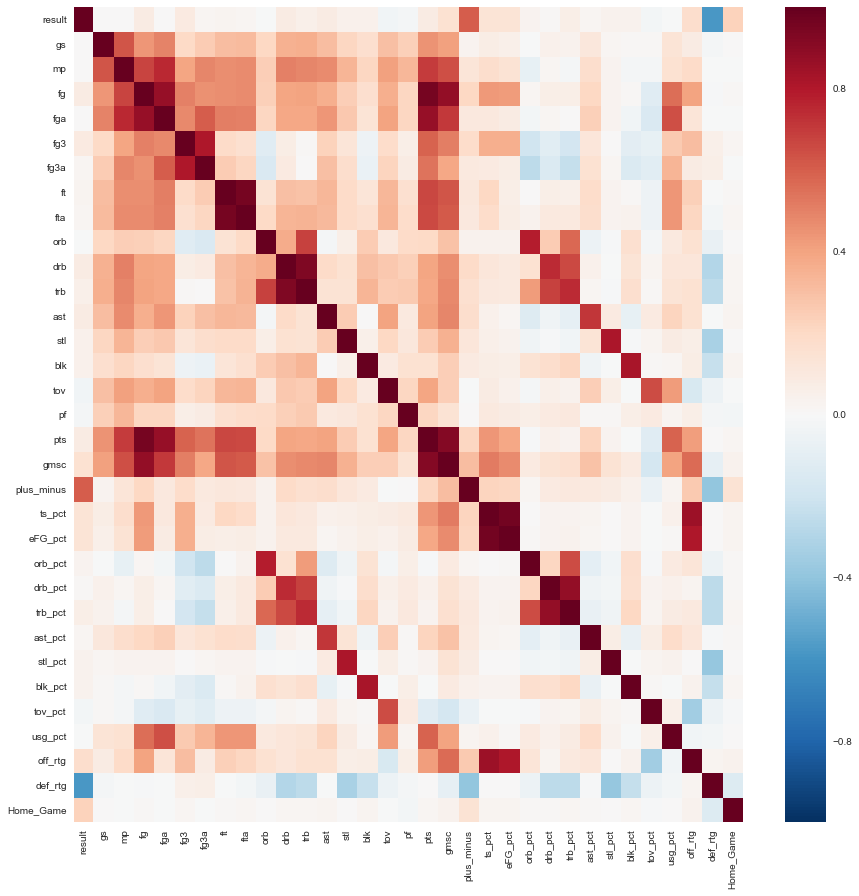

In [32]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(X.corr(), ax=ax)

In [33]:
# all players
# result        1.000000
# plus_minus    0.723178
# off_rtg       0.229745
# gmsc          0.205061
# Home_Game     0.174465
# ts_pct        0.166938
# eFG_pct       0.141529
# trb           0.139657
# drb           0.124308
# trb_pct       0.123673
# fg3           0.120608
# pts           0.118053
# stl           0.098659
# ast           0.094537
# fg            0.092688
# fta           0.087191
# mp            0.086191
# ft            0.085744
# stl_pct       0.084657
# orb           0.079001
# blk           0.061227
# gs            0.059921
# drb_pct       0.055574
# orb_pct       0.049193
# fga           0.025967
# blk_pct       0.024232
# ast_pct       0.023762
# fg3a          0.019927
# usg_pct      -0.050956
# tov          -0.053110
# pf           -0.079974
# tov_pct      -0.080757
# def_rtg      -0.587640
X.corr()['result'].sort_values(ascending=False)

result        1.000000
plus_minus    0.604082
Home_Game     0.231426
off_rtg       0.177695
gmsc          0.155109
eFG_pct       0.139699
ts_pct        0.138584
fg3           0.091261
pts           0.084865
fg            0.083252
ast           0.083047
drb           0.081460
trb_pct       0.065538
trb           0.061547
blk           0.052570
stl           0.048469
blk_pct       0.044019
stl_pct       0.041439
orb_pct       0.031570
ft            0.029640
fta           0.022339
ast_pct       0.021631
fg3a          0.018604
drb_pct       0.012340
mp            0.004756
gs            0.002608
fga           0.001592
usg_pct      -0.000069
orb          -0.006043
pf           -0.022734
tov_pct      -0.028238
tov          -0.031425
def_rtg      -0.578440
Name: result, dtype: float64

In [34]:
del X['result']
del X['gs']
del X['plus_minus']

In [35]:
X.shape

(24866, 30)

In [36]:
y.shape

(24866,)

In [37]:
# checking for nan's
count = 0
for col in X.columns:
    for i, row in enumerate(X[col]):
        if np.isnan(row):
            count += 1
            print i, col, row
print count

0


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
Xs = StandardScaler().fit_transform(X)

In [40]:
Xs = pd.DataFrame(Xs, columns=X.columns)

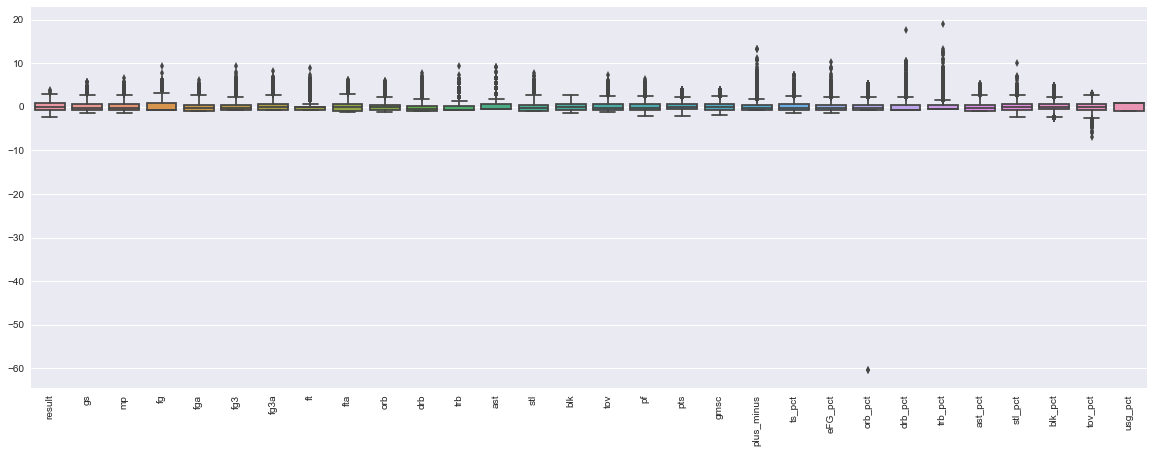

In [41]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca()
ax = sns.boxplot(data=Xs, ax=ax)#, notch=True)
ax.set_xticklabels(cols, rotation=90)
plt.show()

In [42]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, train_size=0.7, random_state=8)

/Users/anthony-mba/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(17406, 30) (17406,) (7460, 30) (7460,)


In [44]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

In [45]:
np.logspace(0,1,100)

array([  1.        ,   1.02353102,   1.04761575,   1.07226722,
         1.09749877,   1.12332403,   1.149757  ,   1.17681195,
         1.20450354,   1.23284674,   1.26185688,   1.29154967,
         1.32194115,   1.35304777,   1.38488637,   1.41747416,
         1.45082878,   1.48496826,   1.51991108,   1.55567614,
         1.59228279,   1.62975083,   1.66810054,   1.70735265,
         1.7475284 ,   1.78864953,   1.83073828,   1.87381742,
         1.91791026,   1.96304065,   2.009233  ,   2.05651231,
         2.10490414,   2.15443469,   2.20513074,   2.25701972,
         2.3101297 ,   2.36448941,   2.42012826,   2.47707636,
         2.53536449,   2.59502421,   2.65608778,   2.71858824,
         2.7825594 ,   2.84803587,   2.91505306,   2.98364724,
         3.05385551,   3.12571585,   3.19926714,   3.27454916,
         3.35160265,   3.43046929,   3.51119173,   3.59381366,
         3.67837977,   3.76493581,   3.85352859,   3.94420606,
         4.03701726,   4.1320124 ,   4.22924287,   4.32

In [46]:
# Set up the parameters. Looking at C regularization strengths on a log scale.
# This takes awhile...
gs_params = {
    'penalty':['l2'],#['l1','l2'],
    'solver':['liblinear'],
    'C': np.logspace(0,3,100) # [7.9248289835391752] 
}

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=3, verbose=1, n_jobs=4)

In [47]:
lr_gridsearch.fit(X_train, np.ravel(y_train))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 11.2min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 59.6min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed: 106.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'penalty': ['l2'], 'C': array([    1.     ,     1.07227, ...,   932.60335,  1000.     ]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [48]:
lr_gridsearch.best_score_

0.055325749741468457

In [49]:
# {'C': 7.9248289835391752, 'penalty': 'l2', 'solver': 'liblinear'} = 0.829 for results 1/0 only
# {'C': 2.8480358684358018, 'penalty': 'l2', 'solver': 'liblinear'} = 0.055 for ppg
lr_gridsearch.best_params_

{'C': 2.8480358684358018, 'penalty': 'l2', 'solver': 'liblinear'}

In [50]:
best_lr = lr_gridsearch.best_estimator_
best_lr.score(X_test, y_test)

0.054691689008042894

In [51]:
from sklearn.model_selection import cross_val_score
cross_val_score(best_lr, X_test, np.ravel(y_test), cv=5)

/Users/anthony-mba/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.05348989,  0.05224868,  0.05503356,  0.0454854 ,  0.05165289])

In [52]:
coef_df = pd.DataFrame({
        'coef':best_lr.coef_[0],
        'feature':X.columns
    })
coef_df['abs_coef'] = np.abs(coef_df.coef)
coef_df.sort_values('abs_coef', ascending=False, inplace=True)

In [53]:
coef_df

,coef,feature,abs_coef
28,1.949755,def_rtg,1.949755
10,-0.991335,ast,0.991335
21,0.900302,trb_pct,0.900302
7,-0.816656,orb,0.816656
27,-0.794476,off_rtg,0.794476
3,-0.794458,fg3,0.794458
17,0.699147,ts_pct,0.699147
22,0.675053,ast_pct,0.675053
29,-0.649988,Home_Game,0.649988
20,-0.626689,drb_pct,0.626689


In [54]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [55]:
dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtc, X_train, np.ravel(y_train), cv=5)
scores

array([ 0.05517634,  0.05714286,  0.05173901,  0.0562933 ,  0.05250943])

In [57]:
print dtc.score(X_train, y_train)
print dtc.score(X_test, y_test)

0.0562449729978
0.0481233243968


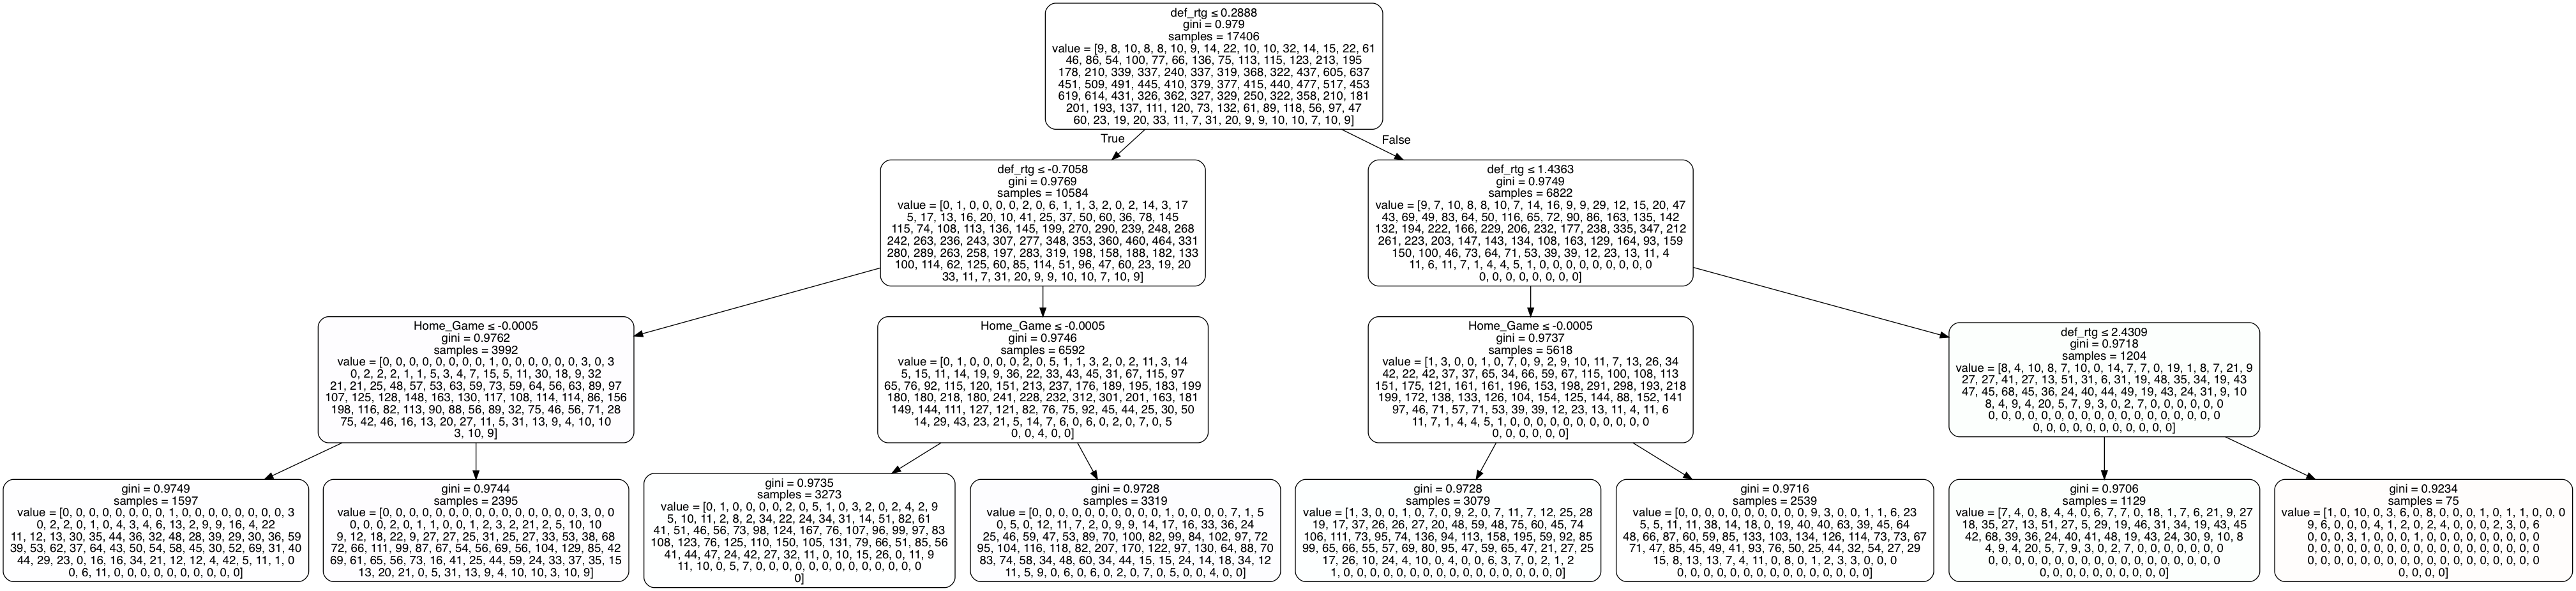

In [58]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [59]:
pd.DataFrame(dtc.feature_importances_, index=X_train.columns.values, columns=['feature_importances']).sort_values('feature_importances', ascending=False)

,feature_importances
def_rtg,0.777362
Home_Game,0.222638
fg,0.000000
off_rtg,0.000000
usg_pct,0.000000
tov_pct,0.000000
blk_pct,0.000000
stl_pct,0.000000
ast_pct,0.000000
trb_pct,0.000000


In [60]:
dtr = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtr, X_train, np.ravel(y_train), cv=5)
scores

array([ 0.32655027,  0.35160911,  0.3374215 ,  0.33233114,  0.32053483])

In [62]:
print dtr.score(X_train, y_train)
print dtr.score(X_test, y_test)

0.342967465271
0.335148517675


In [63]:
pd.DataFrame(dtr.predict(X_test), columns=['dtr'])

,dtr
0,7.696041
1,11.266499
2,1.428058
3,1.428058
4,11.266499
5,1.428058
6,11.266499
7,-7.151799
8,7.696041
9,1.428058


In [64]:
rfc = RandomForestClassifier()#min_samples_leaf=5, )
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [65]:
print rfc.score(X_train, y_train)
print rfc.score(X_test, y_test)

0.996323106975
0.0313672922252


In [66]:
pd.DataFrame(rfc.feature_importances_, index=X_train.columns.values, columns=['feature_importances']).sort_values('feature_importances', ascending=False)

,feature_importances
mp,0.058847
def_rtg,0.058555
usg_pct,0.055354
off_rtg,0.050106
gmsc,0.050053
drb_pct,0.048621
trb_pct,0.048175
ts_pct,0.044071
ast_pct,0.043972
eFG_pct,0.038800


In [67]:
probabilities = y_test

In [68]:
probabilities = pd.concat([probabilities, pd.DataFrame(rfc.predict(X_test), columns=['predicted'], index=y_test.index), pd.DataFrame(rfc.predict_proba(X_test), index=y_test.index)], axis=1)

In [69]:
probabilities.head()

,result,predicted,0,1,2,3,4,5,6,7,...,84,85,86,87,88,89,90,91,92,93
11287,3.0,-11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5592,-9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13443,-17.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9391,7.0,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(probabilities['result'], probabilities['predicted'])

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [72]:
from sklearn.metrics import classification_report

In [73]:
print classification_report(probabilities['result'], probabilities['predicted'])

             precision    recall  f1-score   support

      -49.0       0.10      0.25      0.14         4
      -47.0       0.07      0.25      0.11         4
      -46.0       0.08      0.50      0.14         2
      -45.0       0.00      0.00      0.00         4
      -44.0       0.00      0.00      0.00         4
      -43.0       0.00      0.00      0.00         2
      -42.0       0.00      0.00      0.00         4
      -40.0       0.00      0.00      0.00        11
      -39.0       0.03      0.10      0.05        10
      -38.0       0.00      0.00      0.00         3
      -37.0       0.00      0.00      0.00         2
      -36.0       0.00      0.00      0.00        14
      -35.0       0.06      0.14      0.09         7
      -34.0       0.00      0.00      0.00         8
      -33.0       0.00      0.00      0.00        10
      -32.0       0.00      0.00      0.00        19
      -31.0       0.00      0.00      0.00        25
      -30.0       0.01      0.03      0.02   

/Users/anthony-mba/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
# baseline: this is why you need spread and score
y.mean()

-0.02887476876055658

In [75]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

In [76]:
lr = LinearRegression().fit(X_train, y_train)
print lr.score(X_train, y_train)
print lr.score(X_test, y_test)

0.533466387031
0.532102595634


In [77]:
lasso = Lasso().fit(X_train, y_train)
print lasso.score(X_train, y_train)
print lasso.score(X_test, y_test)

0.436739154182
0.428864337626


In [78]:
lassoCV = LassoCV().fit(X_train, y_train)
print lassoCV.score(X_train, y_train)
print lassoCV.score(X_test, y_test)

0.487386893105
0.476872167188


In [79]:
ridge = Ridge().fit(X_train, y_train)
print ridge.score(X_train, y_train)
print ridge.score(X_test, y_test)

0.533464790764
0.53207824717


In [80]:
ridgeCV = RidgeCV().fit(X_train, y_train)
print ridgeCV.score(X_train, y_train)
print ridgeCV.score(X_test, y_test)

0.533464790764
0.53207824717
